In [41]:
import numpy as np
import pandas 
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score
import seaborn as sns

%matplotlib inline

In [6]:
#task1
df = pandas.read_csv('titanic.csv', index_col='PassengerId')
data = df.query('Survived == 1')
n_data = data.groupby(['Pclass']).agg({'Survived': 'count'})
new_data = n_data.groupby(level=0).apply(lambda x: round(100 * x / float(n_data['Survived'].sum()), 2))
print(new_data)

        Survived
Pclass          
1          39.77
2          25.44
3          34.80


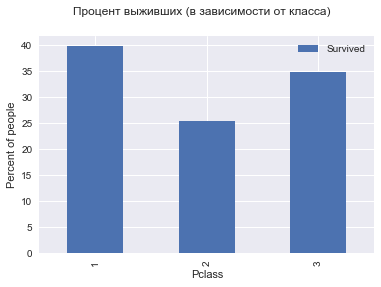

In [7]:
plt.figure()
figure = new_data.plot(kind='bar')
figure.set_ylabel('Percent of people')
figure.set_xlabel('Pclass')
plt.suptitle('Процент выживших (в зависимости от класса)', fontsize = 12)
plt.show()

In [8]:
s_data = data.groupby(['Sex']).agg({'Survived': 'count'})
sex_data = s_data.groupby(level=0).apply(lambda x: round(100 * x / float(s_data['Survived'].sum()), 2))
print(sex_data)

        Survived
Sex             
female     68.13
male       31.87


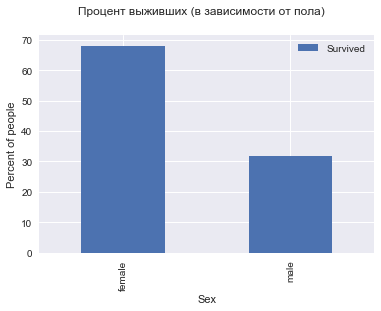

In [9]:
plt.figure()
figure = sex_data.plot(kind='bar')
figure.set_ylabel('Percent of people')
figure.set_xlabel('Sex')
plt.suptitle('Процент выживших (в зависимости от пола)', fontsize = 12)
plt.show()

In [6]:
df[['Pclass', 'Fare']]

,Pclass,Fare
PassengerId,,
1,3,7.2500
2,1,71.2833
3,3,7.9250
4,1,53.1000
5,3,8.0500
6,3,8.4583
7,1,51.8625
8,3,21.0750
9,3,11.1333


In [13]:
first_c = df.query('Pclass == 1')['Fare']
second_c = df.query('Pclass == 2')['Fare']
third_c = df.query('Pclass == 3')['Fare']
print(min(first_c), max(first_c))
data_to_boxplot = [first_c, second_c, third_c]
print(np.median(first_c), np.median(second_c), np.median(third_c))

0.0 512.3292
60.2875 14.25 8.05


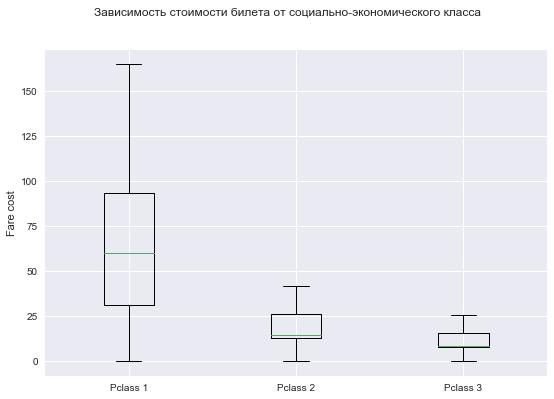

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_boxplot, showfliers=False) #в первом классе очень большой разброс по цене, см принт, 
#поэтому решила не брать выбросы
ax.set_xticklabels(['Pclass 1', 'Pclass 2', 'Pclass 3'])
ax.set_ylabel('Fare cost')
plt.suptitle('Зависимость стоимости билета от социально-экономического класса', fontsize = 12)
plt.show()

In [14]:
#Общий вывод. Во-первых, для первых двух пунктов я считала процент выживших той или иной группы из общего числа выживших. Например,
#Среди всех выживших - 68 процентов лиц женского пола. Самая яркая и очевидная особенность - это то, что значительно больше половины выживших
#- женщины. У пассажиров 2 класса вероятность выжить ниже, чем у пассажиров 1 и 3 классов. Стоимость билетов разнится больше всего
#у пассажиров первого класса (очень длинные усы у ящика). Более того, разнится она настолько, что пришлось убрать выбросы из графика,
#чтобы это как-то читабельнее выглядело (самый дорого билет - 512). Медиана цены билета 1 класса - около 60, 2 класса - 14, 3 класса - 8.

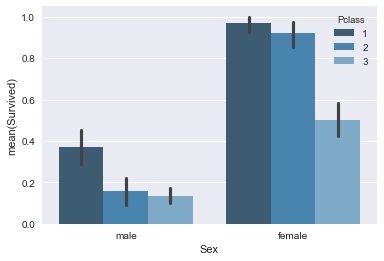

In [15]:
#task2
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df, palette="Blues_d")

In [17]:
#Вывод. У женщин, ожидаемо, вероятность выжить выше, чем у мужчин. Вероятность выжить у женщины первого класса самая высокая - около 97%.
#Вероятность выжить у мужчины третьего класса - наинизшая - около 15 процентов.
#А - вероятность выжить, B - вероятность быть женщиной 1 класса, C - вероятность быть женщиной третьего класса, K - 
#вероятность быть мужчиной первого класса.
#P(A|B) > P(A|C); P(A|B) > P(A|K)

In [18]:
#task3
df["Age"] = df["Age"].fillna(df["Age"].median())

In [19]:
df["Child"] = 0
df["Child"][df["Age"] < 18] = 1
print(df["Survived"][df["Child"] == 1].value_counts(normalize = True))


1    0.539823
0    0.460177
Name: Survived, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [20]:
print(len(df[df.Cabin.isnull()]))

687


In [21]:
#так как я не буду использовать Cabin в качестве предиктора, то можно заполнить чем-нибудь вместо того, чтобы использовать dropna()
print(df.isnull().sum())
df["Cabin"] = df["Cabin"].fillna(value='C27')

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Child         0
dtype: int64


In [22]:
#NA осталось довольно мало, Embarked тоже не будет предиктором, заменю на что-нибудь
df["Embarked"] = df["Embarked"].fillna(value='S')
print(df.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
Child       0
dtype: int64


In [23]:
x_labels = ['Pclass', 'Fare', 'Age', 'Sex', 'Child', 'SibSp']
X, y = df[x_labels], df['Survived']
X.head()

,Pclass,Fare,Age,Sex,Child,SibSp
PassengerId,,,,,,
1,3,7.2500,22.0,male,0,1
2,1,71.2833,38.0,female,0,1
3,3,7.9250,26.0,female,0,0
4,1,53.1000,35.0,female,0,1
5,3,8.0500,35.0,male,0,0


In [24]:
X['Sex'] = X['Sex'].map({'female': 0, 'male':1}).astype(int)
print(X['Sex'].unique())

[1 0]


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
X.head()

,Pclass,Fare,Age,Sex,Child,SibSp
PassengerId,,,,,,
1,3,7.2500,22.0,1,0,1
2,1,71.2833,38.0,0,0,1
3,3,7.9250,26.0,0,0,0
4,1,53.1000,35.0,0,0,1
5,3,8.0500,35.0,1,0,0


In [26]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [ ]:
#Обработка данных. Я заменила все пропущенные значения возраста на медиану по этой колонке. Все остальные пропущенные значения, как мы видим,
#не относятся к колонкам предикторов, поэтому я заменила на одно из значений колонки, какое попалось на глаза и не удалила ни одной строки.
#категориальную переменную "пол" заменила на 0 и 1. Добавила колонку Child из следующих соображений. Кжся, по всем правилам должны
#в первую очередь спасать женщин и детей, поэтому всем лицам младше 18 было присвоено значение 1. Как мы увидим дальше, этот предиктор
#не имеет никакой предсказательной силы в дереве решений. В качестве предиктора добавлено SibSP (кол-во родственников:
#муж/жена/братья/сестры). 

In [27]:
#task4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test.describe()

(623, 6) (268, 6) (623,) (268,)


,Pclass,Fare,Age,Sex,Child,SibSp
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2.376866,29.942165,28.861306,0.664179,0.123134,0.447761
std,0.832254,40.386607,12.479931,0.473160,0.329206,0.803244
min,1.000000,0.000000,0.830000,0.000000,0.000000,0.000000
25%,2.000000,7.895800,22.000000,0.000000,0.000000,0.000000
50%,3.000000,13.208350,28.000000,1.000000,0.000000,0.000000
75%,3.000000,29.268750,34.250000,1.000000,0.000000,1.000000
max,3.000000,262.375000,71.000000,1.000000,1.000000,5.000000


In [29]:
parameters = {'min_samples_split': (5, 6, 7, 8, 9, 10, 11, 12, 13, 14)}
clf = DecisionTreeClassifier()
gs = GridSearchCV(clf, parameters)
gs.fit(np.array(X_train), np.array(y_train))
print('Best result is ',gs.best_score_)
print('Best parametre is', gs.best_estimator_.min_samples_split)

Best result is  0.786516853933
Best parametre is 12


In [30]:
clf_best = DecisionTreeClassifier(min_samples_split=gs.best_estimator_.min_samples_split)

In [31]:
clf_best.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=12, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
importances = pandas.Series(clf_best.feature_importances_, index=x_labels)
print(importances)

Pclass    0.122404
Fare      0.258269
Age       0.194959
Sex       0.416780
Child     0.000000
SibSp     0.007588
dtype: float64


In [33]:
y_pred = clf_best.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.85      0.84       170
          1       0.73      0.72      0.73        98

avg / total       0.80      0.80      0.80       268



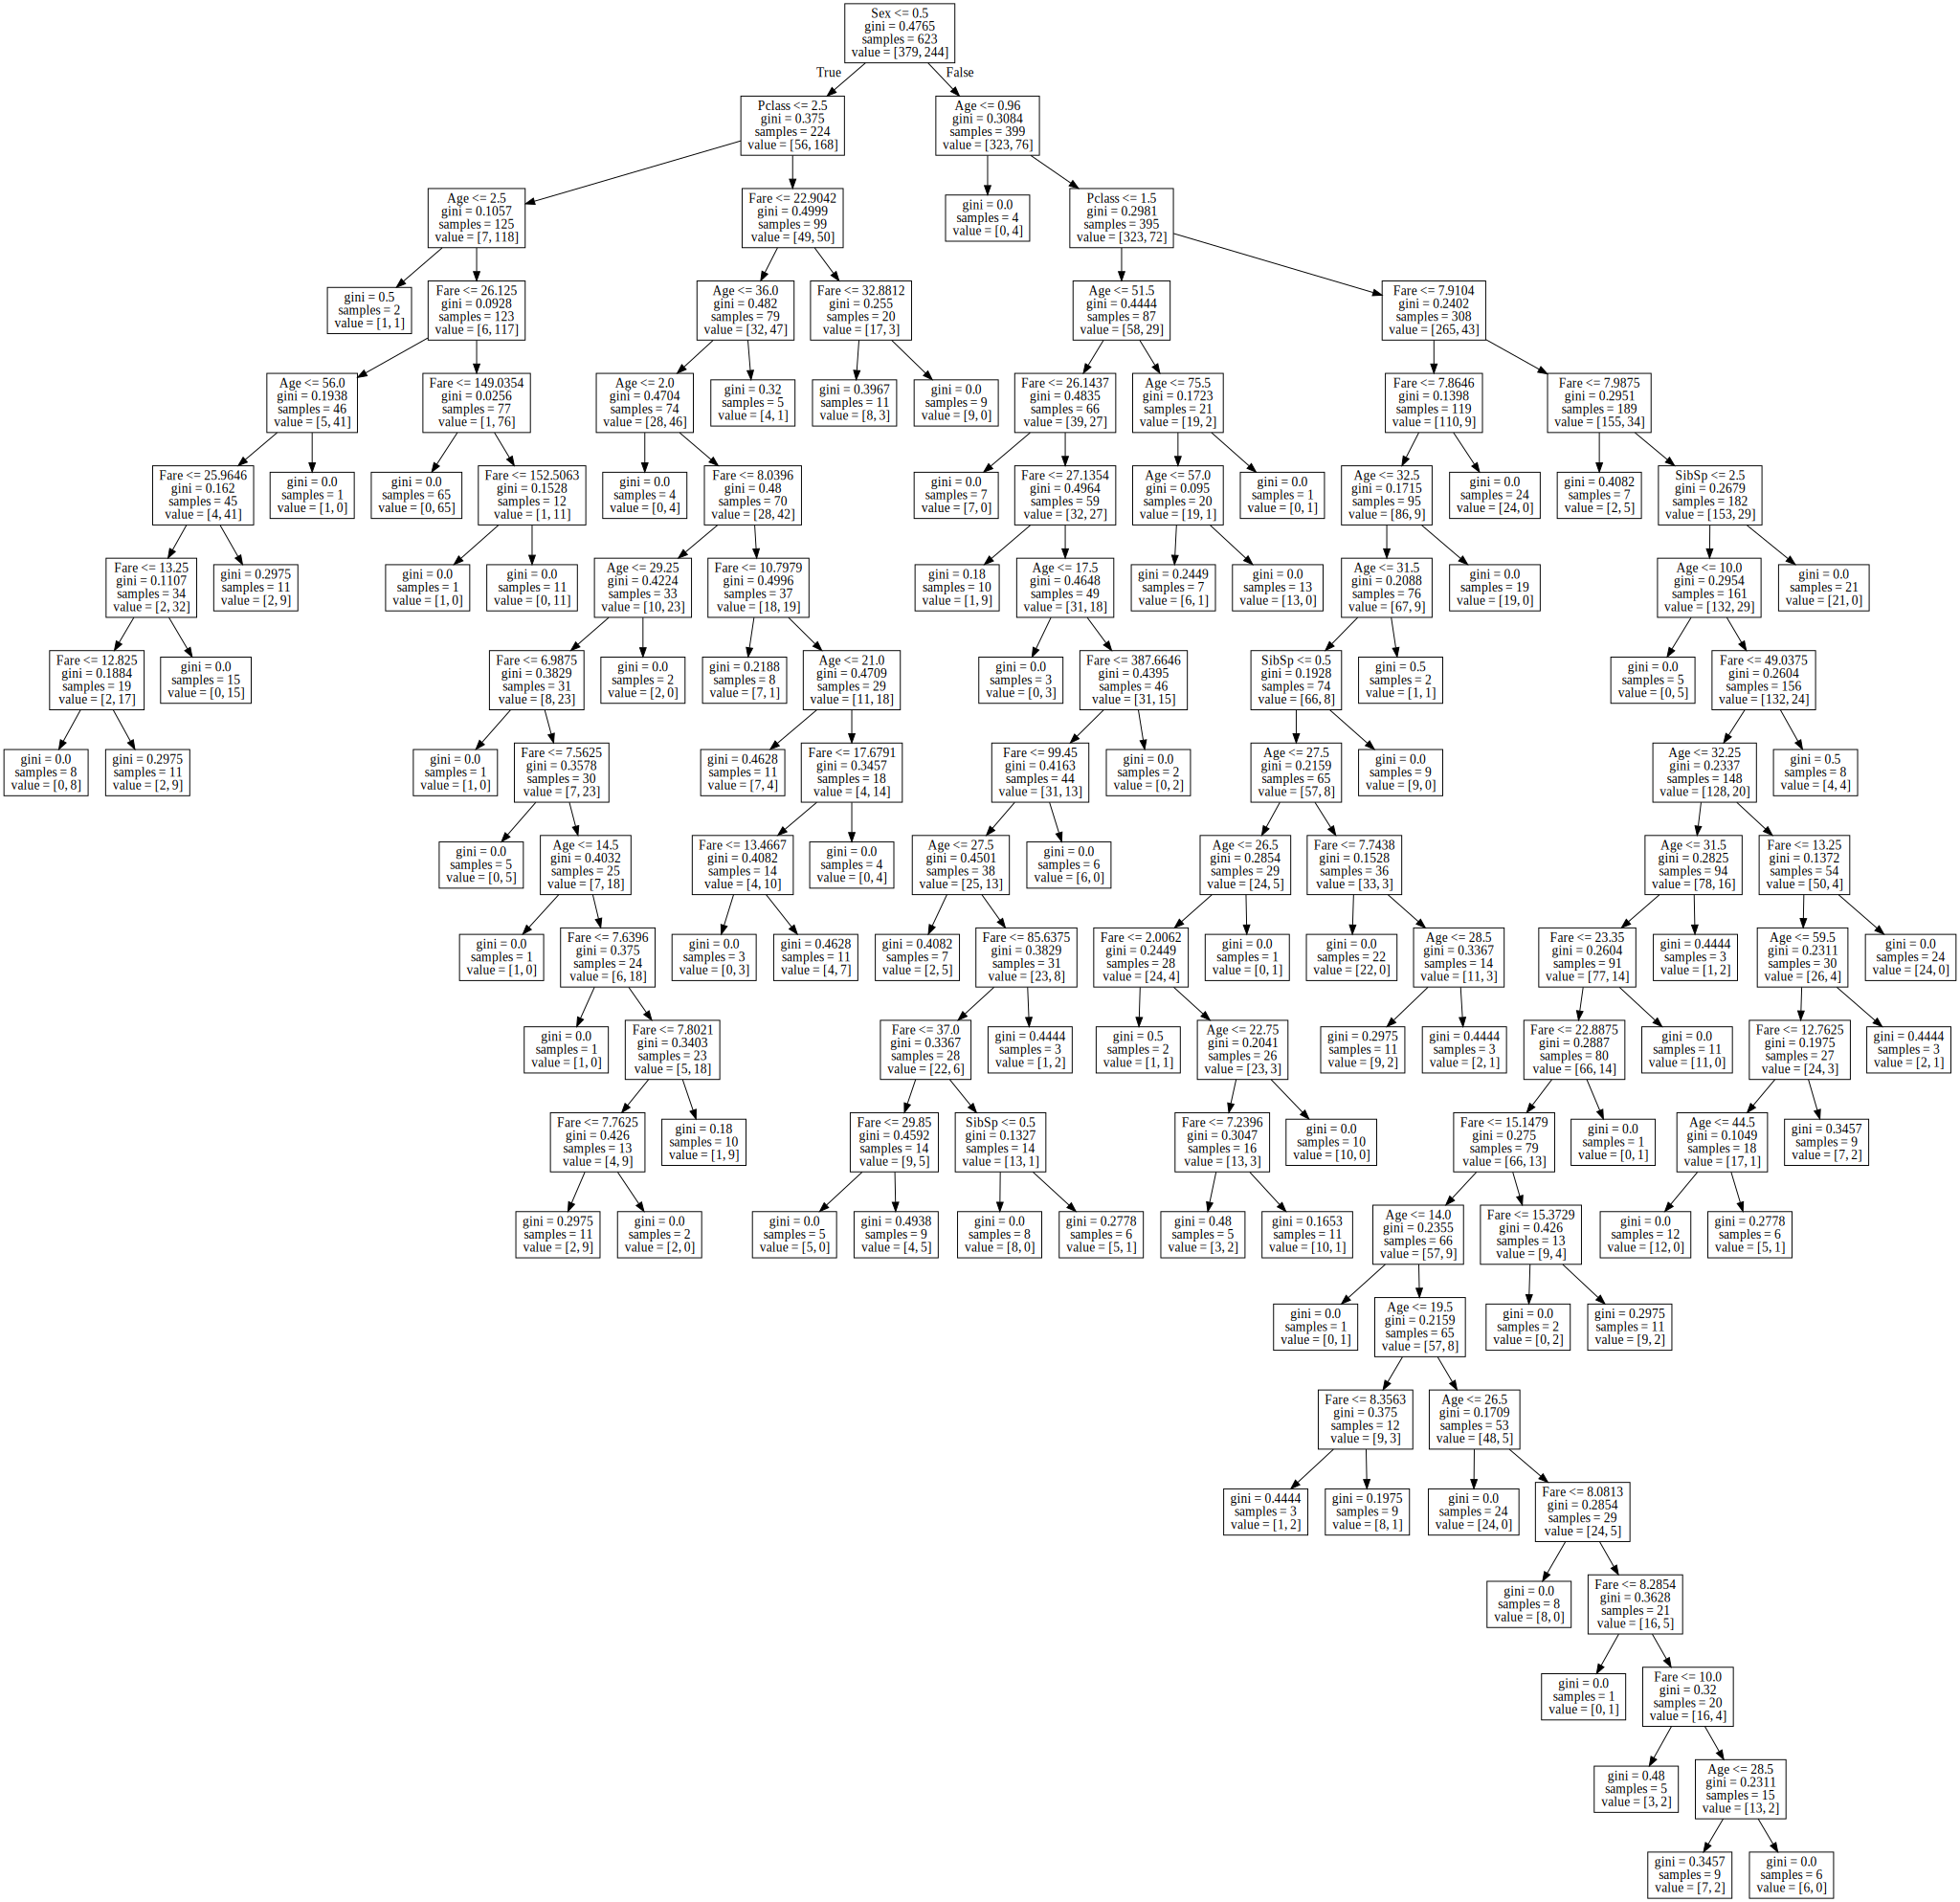

In [38]:
export_graphviz(clf_best, out_file="mytree.dot", feature_names=x_labels)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
#у меня не получилось через gridSearch вытащить меры оценки работы модели, поэтому сделаю здесь циклом.

In [50]:
par = (5, 6, 7, 8, 9, 10, 11, 12, 13, 14)
d = {}
for element in par:
    score = []
    clf1 = DecisionTreeClassifier(min_samples_split=element)
    clf1.fit(np.array(X_train), np.array(y_train))
    y_predict = clf1.predict(X_test)
    score.append(f1_score(y_test, y_predict))
    score.append(recall_score(y_test, y_predict))
    score.append(precision_score(y_test, y_predict))
    d[element] = score
report_df = pandas.DataFrame(d, index=['f1_score', 'recall', 'precision'], columns=d.keys())
print(report_df)

                 5        6         7         8         9         10  \
f1_score   0.729167  0.72449  0.718750  0.735751  0.726316  0.735751   
recall     0.714286  0.72449  0.704082  0.724490  0.704082  0.724490   
precision  0.744681  0.72449  0.734043  0.747368  0.750000  0.747368   

                 11        12        13        14  
f1_score   0.729167  0.728205  0.739583  0.752577  
recall     0.714286  0.724490  0.724490  0.744898  
precision  0.744681  0.731959  0.755319  0.760417  


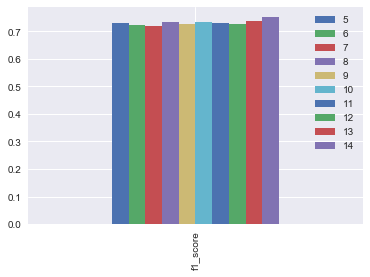

In [60]:
report_df[0:1].plot.bar()

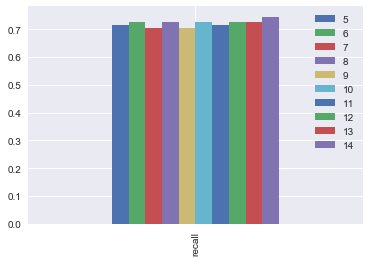

In [61]:
report_df[1:2].plot.bar()

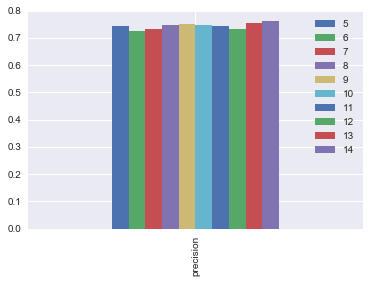

In [63]:
report_df[2:3].plot.bar()

In [ ]:
#В качестве параметра модели, который будет варьироваться, я взяла min_samples_split. Вообще в модели дерева решений этот параметр
# связан с максимальной глубиной дерева (min_samples_split тоже решает, до какой степени дереву ветвиться) и с min_samples_leaf. 
# В общем и целом, хотелось посмотреть, насколько нужно дробить данные, чтобы у нас достаточно хорошие показатели получились. Я пару 
#раз запускала gridSearch: в первый раз с очень большим шагом (5, 10, 15, 20, 30, 35, 40, 50). В первый раз параметр остановился
#на первом десятке, поэтому запустила gridSearch на параметрах, которые сейчас в коде. В тренировочной выборке 623 строки. Для меня было
#неожиданно, что gridSearch выберет довольно маленький показатель min_samples_split для таких данных. Ожидала, что мой предиктор 
#Child не сработает, потому что он связан с предиктором Age (зачем Child, когда просто есть возраст пассажиров) (хотя вероятность 
#выжить у ребенка больше случайной, но не на много:(). 
#Показатель  precision у разных значений параметра min_samples_split в среднем выше ф-меры и recall. Это значит, что мало размечено
#как False Positive (когда погибшего приняли за живого). То, что recall ниже, означает наличие False Negative (живого отнесли к умершим)

In [72]:
#task5
model = RandomForestClassifier(n_estimators = 80)

In [73]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.85      0.88      0.87       170
          1       0.78      0.73      0.76        98

avg / total       0.83      0.83      0.83       268



In [70]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

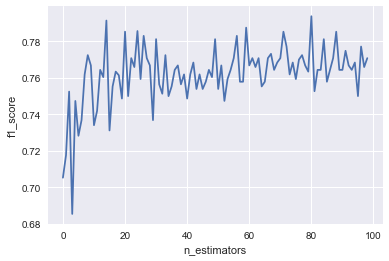

In [74]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('f1_score')
plt.show()

In [75]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(recall_score(y_test, y_pred))

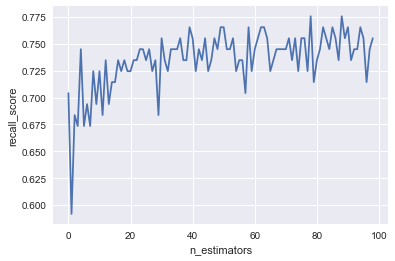

In [76]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('recall_score')
plt.show()

In [77]:
scores = []
for t in range(1,100):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(precision_score(y_test, y_pred))

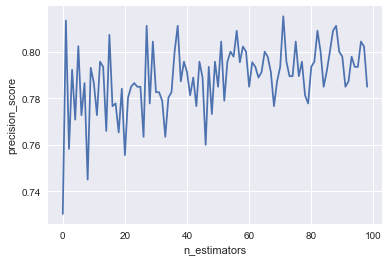

In [78]:
plt.plot(scores)
plt.xlabel('n_estimators')
plt.ylabel('precision_score')
plt.show()

In [ ]:
#По показателям 3 мер лучше всего строить для этих данных 60-80 деревьев.